In [16]:
import torch
from torch import nn # neural networks
import matplotlib.pyplot as plt
import torch.version

# check pytorch version
print(torch.__version__)

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# extra bracket required for the model
X = torch.arange(start, end, step).unsqueeze(dim=1)

# linear regression basic formula
y = weight * X + bias

# 80% of data is being used for training split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# function to plot data and predictions
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

    # check for predictions
    if predictions is not None:
        # plot predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    # to show legends
    plt.legend(prop={"size": 14})

# create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.module
    def __init__(self):
        super().__init__()

        # initialize model parameters, we won't be doing it in complex datasets 
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # default it is true
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float)) # this is float 32
        
    # forward method to define the computation in the model
    def forward(self, x: torch.tensor) -> torch.Tensor: # x is the input data ,arrows means returns a torch.tensor
        return torch.sigmoid(self.weights * x + self.bias) # sigmoid makes output stay between 0 and 1

# create a random seed
torch.manual_seed(69)

# create instance of the model created (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check out parameters
print(list(model_0.parameters()))


2.6.0+cu126
[Parameter containing:
tensor([-0.5259], requires_grad=True), Parameter containing:
tensor([-2.6043], requires_grad=True)]


from here on we write code line by line just like mentioned in the tutorial 

In [26]:
with torch.inference_mode():#torch.no_grad() also does the job but inference is preffered
    y_preds=model_0(X_test)*10
    y_preds= y_preds.flip(0)

y_preds

tensor([[0.4230],
        [0.4273],
        [0.4316],
        [0.4360],
        [0.4404],
        [0.4449],
        [0.4494],
        [0.4539],
        [0.4585],
        [0.4631]])

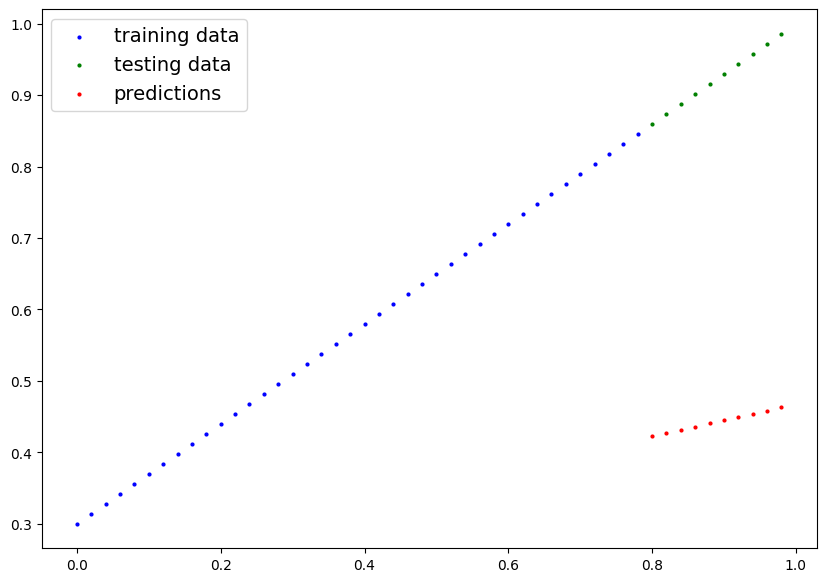

In [27]:
plot_prediction(predictions=y_preds)

the whole idea of training is for a model to move from some unknown parameters to known parameters, write now we are getting shitty predictions on the graph 

one way to measure the error in predictions is to use loss function/cost function/criterion

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.5259])), ('bias', tensor([-2.6043]))])

now we setup loss function and optimizer

there are lots of loss function , we will use L1loss , a common loss function (this is mean absolute error)

In [ ]:
#setup a loss functions 
loss_fn=nn.L1Loss()#aim is to minimize the distance between the prediction and actual line 

#setup an optimizer(stochastic gradient descent)
optimizer=torch.optim.SGD(params=model.parameter(),
                         lr=0.01)#learning rate = possibly the most important hyper parameter you can set
